In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2') # 124M
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

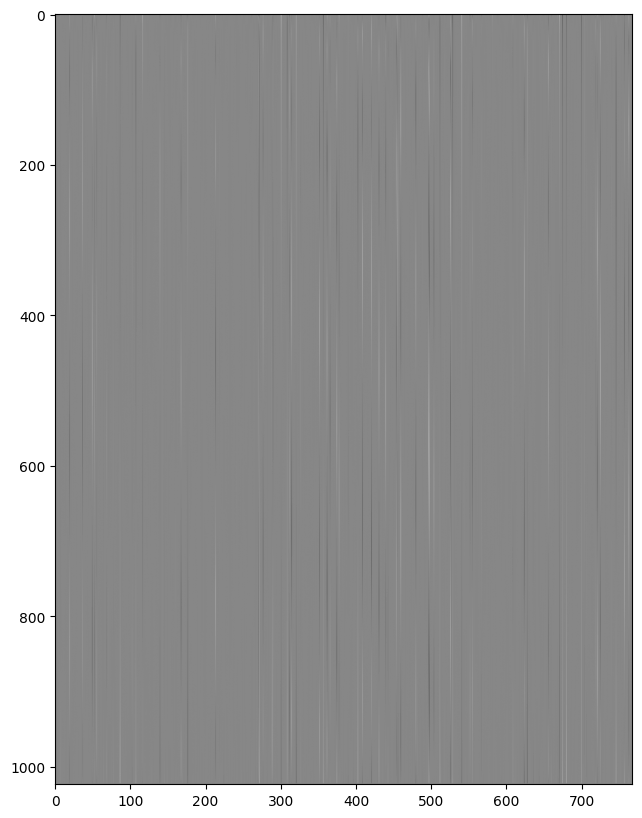

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(sd_hf['transformer.wpe.weight'], cmap='gray')

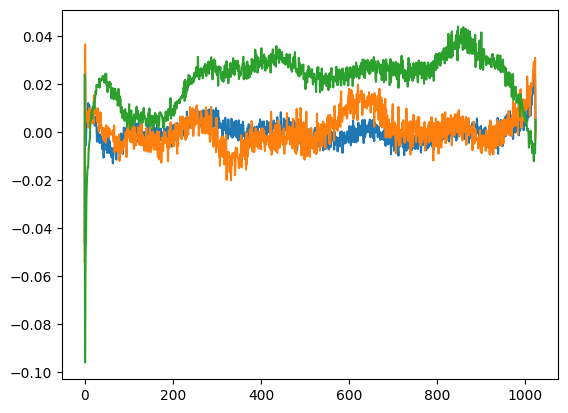

In [6]:
plt.plot(sd_hf['transformer.wpe.weight'][:,150])
plt.plot(sd_hf['transformer.wpe.weight'][:,200])
plt.plot(sd_hf['transformer.wpe.weight'][:,250])
# jagged: not fully trained
# somewhat counterintuitive: in the original transformer, they used positional encoding using fixed, sinusoidal functions whereas here they treat this as parameter, and surprisingly the learned parameters still somewhat recover the sinusoidal behavior. In principle, this shouldn't even be this structured but totally random.

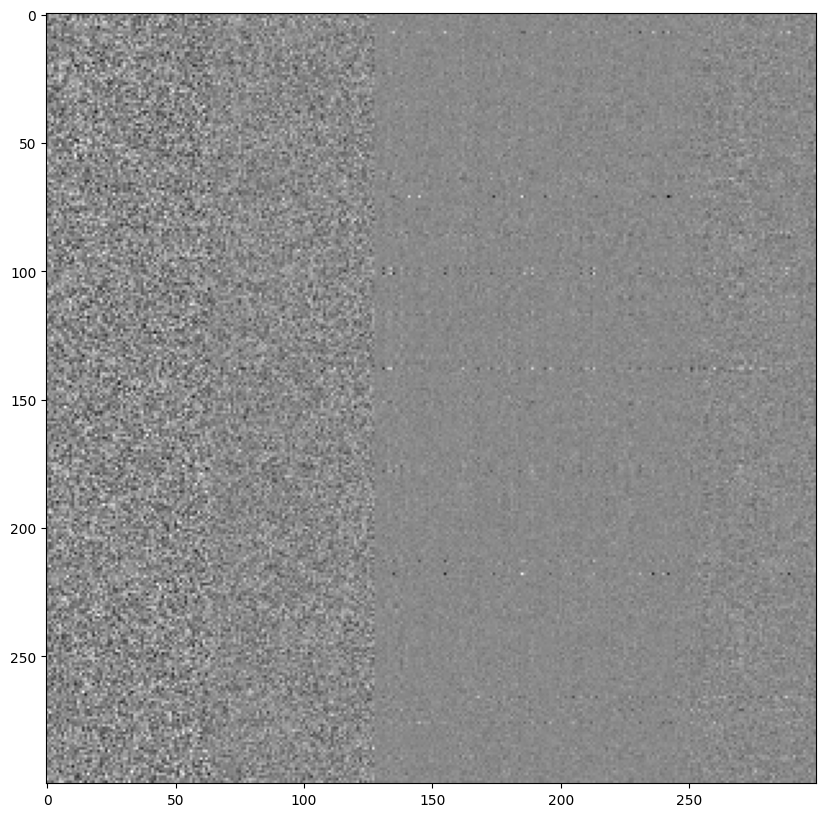

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(sd_hf['transformer.h.1.attn.c_attn.weight'][:300, :300], cmap='gray')

In [8]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)

In [9]:
import torch
from torch import nn
emb = nn.Embedding(12,3)

In [10]:
emb(torch.tensor([11,1,2,3]))

tensor([[ 0.8963,  0.0499,  2.2667],
        [-2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047, -0.7521],
        [ 1.6487, -0.3925, -1.4036]], grad_fn=<EmbeddingBackward0>)

In [11]:
import tiktoken, torch

In [12]:
enc = tiktoken.get_encoding('gpt2')

In [13]:
encoded = enc.encode('Hello, I am under the water,')

In [14]:
torch.unsqueeze(torch.tensor(encoded), 0).repeat(4,1) # identical sequences of the original tokens.

tensor([[15496,    11,   314,   716,   739,   262,  1660,    11],
        [15496,    11,   314,   716,   739,   262,  1660,    11],
        [15496,    11,   314,   716,   739,   262,  1660,    11],
        [15496,    11,   314,   716,   739,   262,  1660,    11]])

In [15]:
torch.randn(2,3,4)

tensor([[[-0.4880,  1.1914, -0.8140, -0.7360],
         [-0.8371, -0.9224,  1.8113,  0.1606],
         [ 0.1971, -1.1441,  0.3383,  1.6992]],

        [[ 0.0109, -0.3387, -1.3407, -0.5854],
         [-0.5644,  1.0563, -1.4692,  1.4332],
         [ 0.7440, -0.4816, -1.0495,  0.6039]]])

In [16]:
# get tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [17]:
with open('input.txt', 'r') as f:
    text = f.read()

In [18]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(text)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [19]:
import torch
buf = torch.tensor(tokens[:24+1])
x = buf[:-1].view(4, 6) # notice the [:-1] which avoids the last token
y = buf[1:].view(4, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [22]:
print(sd_hf['lm_head.weight'].shape)
print(sd_hf['transformer.wte.weight'].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [23]:
(sd_hf['lm_head.weight'] == sd_hf['transformer.wte.weight']).all() # True

tensor(True)

In [24]:
print(sd_hf['lm_head.weight'].data_ptr())
print(sd_hf['transformer.wte.weight'].data_ptr())

6264307712
6264307712


In [26]:
x = torch.zeros(768)
n = 100
for i in range(n):
    x += n ** -0.5 * torch.randn(768) # note that on every iteration, we need to know what the total n is going to be.
print(x.std())

tensor(1.0059)
